Project Title: "Predicting Titanic Survivors using Random Forest: A Comprehensive Machine Learning Approach"
# **Problem Statement:**
The objective of this project is to build a classification model to predict the survival of passengers aboard the Titanic using machine learning techniques. We will use the Titanic dataset from Kaggle, which contains various features of the passengers, including personal details, socio-economic status, and travel details. The goal is to create a robust model that can accurately classify whether a passenger survived the Titanic disaster based on these features.


# Problem Description:
The Titanic dataset includes information about the passengers on the Titanic, such as their age, gender, ticket class, number of siblings/spouses aboard, number of parents/children aboard, fare, and port of embarkation. The dataset also includes a binary outcome variable indicating whether each passenger survived (1) or did not survive (0) the disaster.


Using the Random Forest algorithm, we aim to:

Preprocess and clean the dataset to handle missing values and encode categorical variables.

Perform exploratory data analysis to understand the relationships between features and the target variable.

Split the data into training and testing sets to build and evaluate the model.

Scale the features to ensure they are on the same scale, which helps improve model performance.

Train the Random Forest classifier to predict the survival of passengers.

Evaluate the model's performance using metrics such as accuracy, confusion matrix, and classification report.

Provide a mechanism for user input to make real-time survival predictions for new passenger data.

This project will demonstrate the application of Random Forest in a real-world classification problem and showcase best practices in data preprocessing, model training, and evaluation.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('./taitanic.csv')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)  # Drop the 'Cabin' column due to many missing values

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [13]:
# Drop unnecessary columns
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

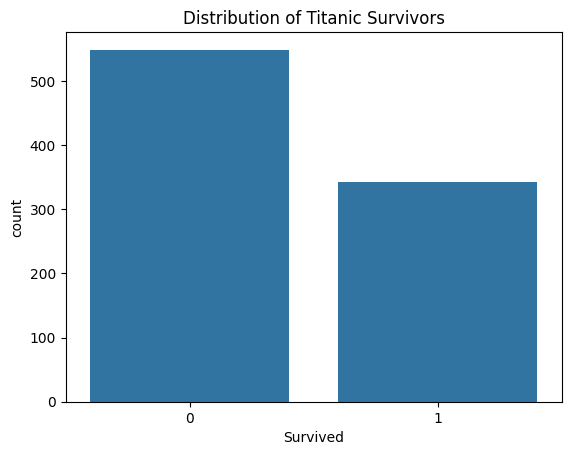

In [14]:
# Visualize the distribution of survivors
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Titanic Survivors')
plt.show()

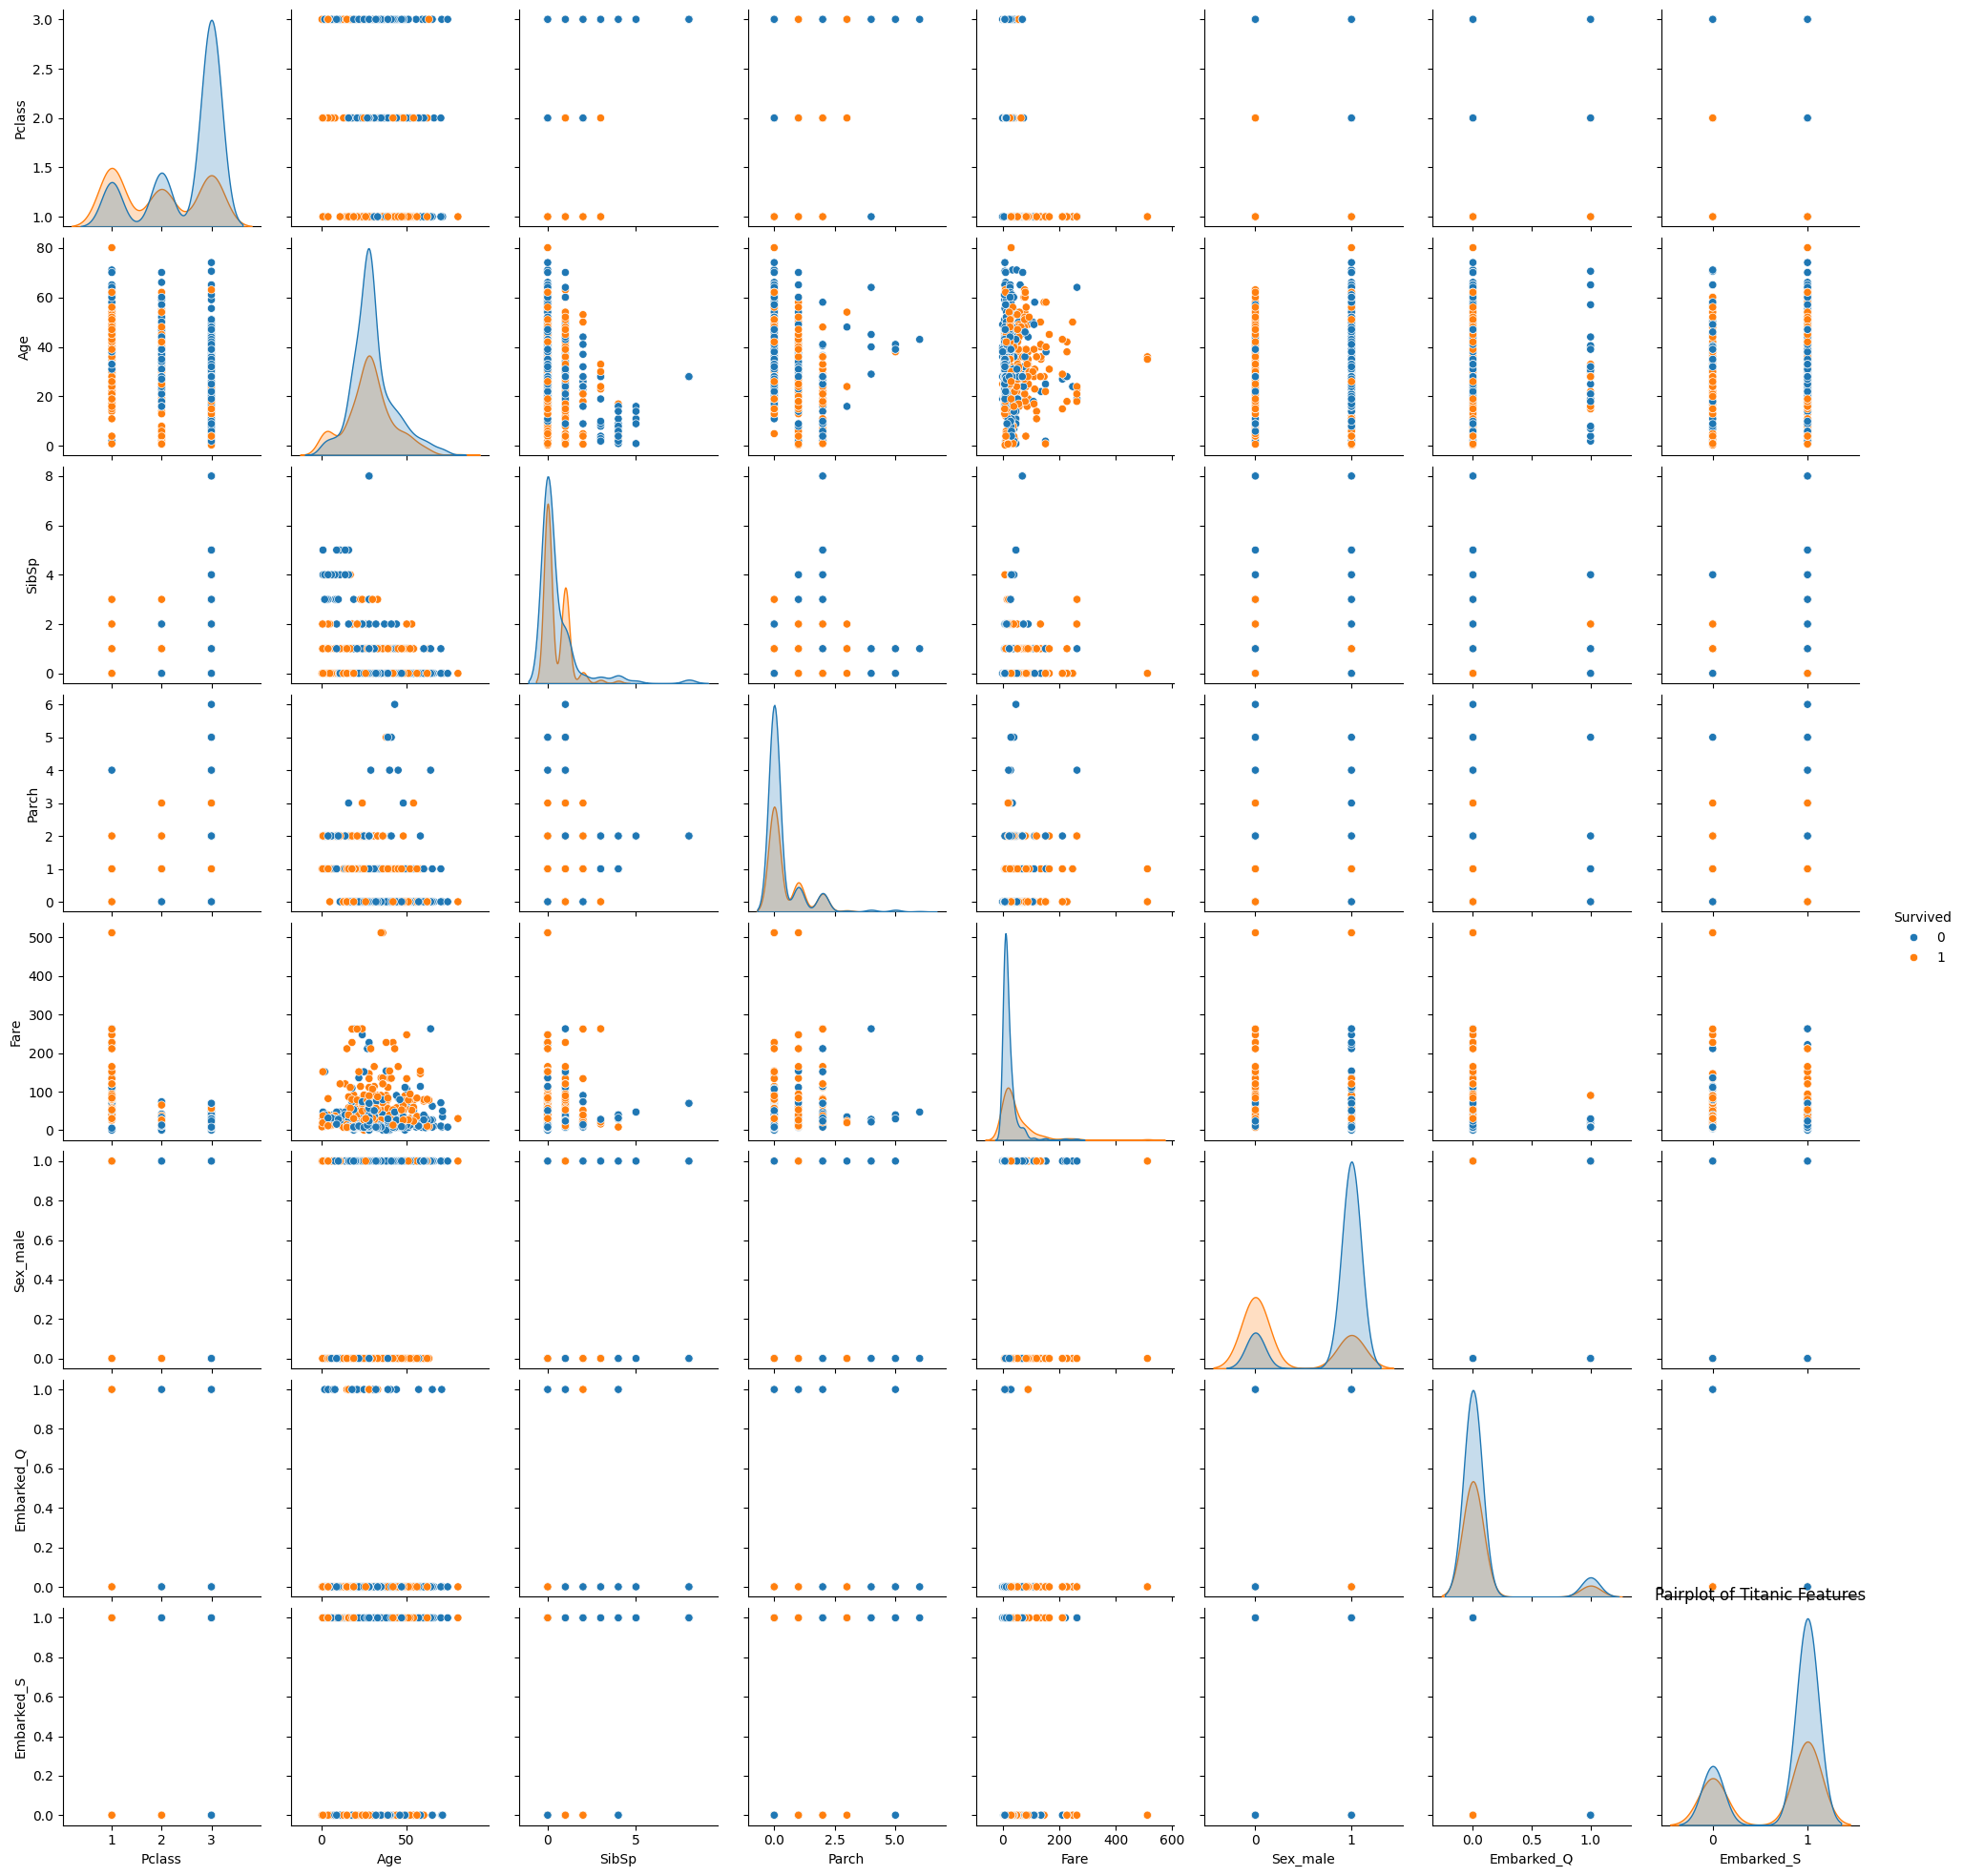

In [15]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Survived')
plt.title('Pairplot of Titanic Features')
plt.show()

In [16]:
# Split the data into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Train a Random Forest model
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions
y_pred = classifier.predict(X_test_scaled)

In [20]:
# Calculate accuracy percentage
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 82.12290502793296


In [21]:
# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



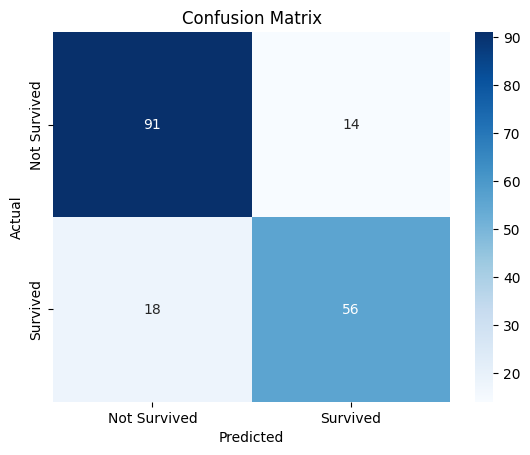

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Function to take user input and predict survival
def predict_survival():
    pclass = int(input("Enter Passenger Class (1/2/3): "))
    sex = input("Enter Sex (male/female): ")
    age = float(input("Enter Age: "))
    sibsp = int(input("Enter Number of Siblings/Spouses Aboard: "))
    parch = int(input("Enter Number of Parents/Children Aboard: "))
    fare = float(input("Enter Fare: "))
    embarked = input("Enter Port of Embarkation (C/Q/S): ")

    # Encode input data
    sex = 1 if sex == "male" else 0
    embarked_C = 1 if embarked == "C" else 0
    embarked_Q = 1 if embarked == "Q" else 0

    # Create the input array
    user_input = np.array([pclass, age, sibsp, parch, fare, sex, embarked_C, embarked_Q]).reshape(1, -1)

    # Scale the input data
    user_input_scaled = scaler.transform(user_input)

    # Predict the survival
    predicted_survival = classifier.predict(user_input_scaled)
    print("Predicted Survival:", "Survived" if predicted_survival[0] == 1 else "Not Survived")

In [24]:
# Call the function to take user input and predict survival
predict_survival()

Predicted Survival: Not Survived


In [25]:
# Add these lines to your notebook after training
import joblib
joblib.dump(classifier, 'random_forest_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']